In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [29]:
# Генерируем датасет на 2 класс
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# Разделяем на две выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=2)
# Обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# Получаем предсказания
lr_probs = model.predict_proba(X_valid)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_valid, lr_probs)
print(f'LogisitcRegression: ROC AUC = {lr_auc}')
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_valid, lr_probs)
print(f'False Positive Rate = {fpr} \n True Positive Rate = {tpr} \n Treshold = {treshold}')
roc_auc = auc(fpr, tpr)
print(f'ROC AUC = {roc_auc}')

LogisitcRegression: ROC AUC = 0.9028205128205128
False Positive Rate = [0.         0.         0.         0.00416667 0.00416667 0.00833333
 0.00833333 0.0125     0.0125     0.01666667 0.01666667 0.025
 0.025      0.02916667 0.02916667 0.0375     0.0375     0.04583333
 0.04583333 0.05416667 0.05416667 0.05833333 0.05833333 0.0625
 0.0625     0.06666667 0.06666667 0.07083333 0.07083333 0.075
 0.075      0.07916667 0.07916667 0.08333333 0.08333333 0.0875
 0.0875     0.09166667 0.09166667 0.09583333 0.09583333 0.10833333
 0.10833333 0.1125     0.1125     0.125      0.125      0.12916667
 0.12916667 0.13333333 0.13333333 0.1375     0.1375     0.14166667
 0.14166667 0.14583333 0.14583333 0.15       0.15       0.15416667
 0.15416667 0.15833333 0.15833333 0.16666667 0.16666667 0.175
 0.175      0.17916667 0.17916667 0.18333333 0.18333333 0.20416667
 0.20416667 0.20833333 0.20833333 0.21666667 0.21666667 0.2375
 0.2375     0.25416667 0.25416667 0.25833333 0.25833333 0.29583333
 0.29583333 0.3   

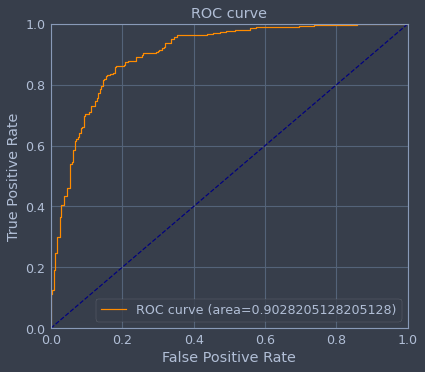

In [33]:
from jupyterthemes import jtplot

jtplot.style()

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area={roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()